In [1]:
from tensorflow.keras import datasets, layers, models, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_val, y_val) = datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10)

In [16]:
inputs = layers.Input((28, 28, 1))
x = layers.Conv2D(16, 3, activation='relu')(inputs)
x = layers.Conv2D(16, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, x)

In [17]:
model.compile('adam', 'categorical_crossentropy')

In [18]:
# model.fit(x_train, y_train, batch_size=128,epochs=10, validation_data=(x_val, y_val))

In [19]:
bs = 256
epochs = 20
step_per_epochs = x_train.shape[0] // bs
idxs = np.arange(len(x_train))
epoch_loss = []
for i in range(epochs):
    batch_loss = []
    for j in range(step_per_epochs):
        idx = idxs[j*bs:(j+1)*bs]
        x = x_train[idx]
        y = y_train[idx]
        loss = model.train_on_batch(x, y,)
        batch_loss.append(loss)
    total_loss = np.mean(batch_loss)
    # save model if improved
    epoch_loss.append(total_loss)
    if total_loss <= np.min(epoch_loss):
        print('save model')
        model.save('model.h5')
    
    print(total_loss)
    np.random.shuffle(idxs)



save model
2.170967772985116
save model
1.0628881676074786
save model
0.7527683539013578
save model
0.6298740176308868
save model
0.5498041049537495
save model
0.49937232742961657
save model
0.4514260075540624
save model
0.42070251550429905
save model
0.3987647540803648
save model
0.37431283893748224
save model
0.35540111706807065
save model
0.3401539996266365
save model
0.3288078409356949
save model
0.3141312274413231
save model
0.30056194483469695
save model
0.29054721221964586
save model
0.28539034004649544
save model
0.28448129209697753
save model
0.2709013365018062
save model
0.26985913820755786


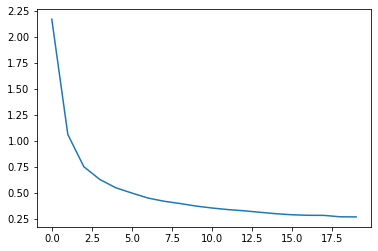

In [20]:
plt.plot(epoch_loss)